## Семинар 2 "Распознавание рукописных цифр"

ФИО: Коновалов Михаил Анатольевич

В этом задании мы используем нейронную сеть из предыдущего семинара для распознавания рукописных цифр. Также мы исследуем как влияет выбор нелинейности и предобработка данных на качество классификации. 

Чтобы не тратить время на подготовку данных, мы прилагаем готовый код с примером использования для получения обучающей и тестовой выборок. Для запуска скрипта вам понадобится библиотека PyTorch (инструкции по установке можно найти на сайте <a href="http://pytorch.org">pytorch.org</a>)

In [2]:
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST
from torchvision import transforms
import numpy as np
from layers import Linear, Sigmoid, NLLLoss, NeuralNetwork # Results from Seminar 1
%matplotlib inline
import torch
from tqdm.notebook import tqdm
import math
import scipy
from sklearn.metrics import accuracy_score

In [127]:
transform = transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                    ])
train_dataset = MNIST('.', train=True, download=True, transform=transform)
test_dataset = MNIST('.', train=False, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=True)

In [69]:
train_dataset.data[0].shape

torch.Size([28, 28])

In [5]:
for X, y in train_loader:
    break

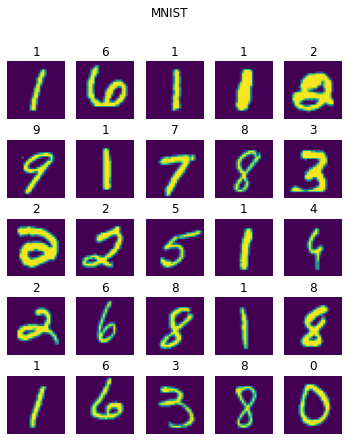

In [14]:
plt.figure(figsize=(6, 7))
plt.suptitle("MNIST")
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(X[i].reshape(28, 28))
    plt.title(int(y[i]))
    plt.axis('off')

### Часть 1: MNIST
Обучите полносвязную нейронную сеть с архитектурой 784-100-100-10 и сигмоидой в качестве нелинейности. Какую точность классификации удалось получить? Нарисуйте график сходимости на обучающей и тестовой выборках. В качестве темпа обучения (learning rate) возьмите 0.01

In [101]:
def train_nn(nn, train, test, loss=NLLLoss(), learning_rate=1e-2, n_epochs=20, verbose=False):
    
    train_loss_values = []
    train_accuracy_values = []
    test_loss_values = []
    test_accuracy_values = []

    for epoch in range(n_epochs):
        tmp_train_loss_values = []
        tmp_train_accuracy_values = []
        for X, y in train:
            predict = nn.forward(X.numpy().reshape(X.shape[0], X.shape[-1] * X.shape[-2]))
            tmp_train_loss_values.append(loss.forward(predict, y.numpy()))
            tmp_train_accuracy_values.append(accuracy_score(y.numpy(), np.argmax(loss.p, axis=1)))
            nn.backward(loss.backward())
            nn.step(learning_rate)
        
        tmp_test_loss_values = []
        tmp_test_accuracy_values = []
        for X, y in test:
            predict = nn.forward(X.numpy().reshape(X.shape[0], X.shape[-1] * X.shape[-2]))
            tmp_test_loss_values.append(loss.forward(predict, y.numpy()))
            tmp_test_accuracy_values.append(accuracy_score(y.numpy(), np.argmax(loss.p, axis=1)))

        train_loss_value = sum(tmp_train_loss_values) / len(tmp_train_loss_values)
        train_accuracy_value = sum(tmp_train_accuracy_values) / len(tmp_train_accuracy_values)
        train_loss_values.append(train_loss_value)
        train_accuracy_values.append(train_accuracy_value)

        test_loss_value = sum(tmp_test_loss_values) / len(tmp_test_loss_values)
        test_accuracy_value = sum(tmp_test_accuracy_values) / len(tmp_test_accuracy_values)
        test_loss_values.append(test_loss_value)
        test_accuracy_values.append(test_accuracy_value)
        
        if verbose and (epoch % verbose == 0):
            print(f"Epoch: {epoch + 1}\nTrain Loss: {train_loss_value}    Test Loss: {test_loss_value}")
            print(f"Train accuracy: {train_accuracy_value}    Test accuracy: {test_accuracy_value}\n")
        
    return train_loss_values, test_loss_values, train_accuracy_values, test_accuracy_values

In [45]:
def learning_curves(train_loss_values, test_loss_values, train_accuracy_values, test_accuracy_values, title):
    plt.figure(figsize=(15, 5))
    plt.suptitle(title)
    
    plt.subplot(1, 2, 1)
    plt.plot(train_loss_values, label="Train")
    plt.plot(test_loss_values, label="Test")
    plt.title("Loss curve")
    plt.xlabel("n_epochs")
    plt.ylabel("NLLLoss")
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(train_accuracy_values, label="Train")
    plt.plot(test_accuracy_values, label="Test")
    plt.title("Accuracy curve")
    plt.xlabel("n_epochs")
    plt.ylabel("Accuracy")
    plt.legend()

In [41]:
nn = NeuralNetwork(modules=[
        Linear(784, 100),
        Sigmoid(),
        Linear(100, 100),
        Sigmoid(),
        Linear(100, 10),
    ])

train_loss_values, test_loss_values, train_accuracy_values, test_accuracy_values = train_nn(
    nn=nn, train=train_loader, test=test_loader, verbose=1)

Epoch: 1
Train Loss: 2.303015122614558    Test Loss: 2.301465034632327
Train accuracy: 0.10755    Test accuracy: 0.11351837060702875
Epoch: 2
Train Loss: 2.3024888724125496    Test Loss: 2.300604323960447
Train accuracy: 0.1085    Test accuracy: 0.1136182108626198
Epoch: 3
Train Loss: 2.3017918688177157    Test Loss: 2.3003556940451446
Train accuracy: 0.11188333333333333    Test accuracy: 0.11331869009584665
Epoch: 4
Train Loss: 2.29944153754536    Test Loss: 2.2960642309666417
Train accuracy: 0.11576666666666667    Test accuracy: 0.11351837060702875
Epoch: 5
Train Loss: 2.2819119191670385    Test Loss: 2.243630023711187
Train accuracy: 0.16005    Test accuracy: 0.23742012779552715
Epoch: 6
Train Loss: 2.0008098557789213    Test Loss: 1.6595022244317965
Train accuracy: 0.32745    Test accuracy: 0.391573482428115
Epoch: 7
Train Loss: 1.4720824926947824    Test Loss: 1.3230546408393669
Train accuracy: 0.4427833333333333    Test accuracy: 0.5231629392971247
Epoch: 8
Train Loss: 1.19691856

Train Loss: 0.2937    Train accuracy: 0.9226
Test Loss: 0.2873   Test accuracy: 0.9225


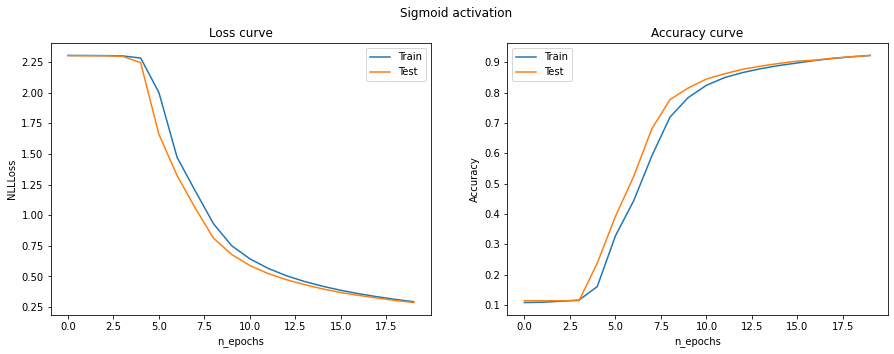

In [49]:
print(f"Train Loss: {round(train_loss_values[-1], 4)}    Train accuracy: {round(train_accuracy_values[-1], 4)}")
print(f"Test Loss: {round(test_loss_values[-1], 4)}   Test accuracy: {round(test_accuracy_values[-1], 4)}")

learning_curves(train_loss_values, test_loss_values, train_accuracy_values, test_accuracy_values, 
                title="Sigmoid activation")

### Часть 2: Нелинейности

Обучите нейронную сеть с другими нелинейностями: ReLU и ELU. Сравните скорости сходимости и качество классификации с различными функциями активации.

In [50]:
class ReLU:
    def __init__(self):
        pass
    
    def forward(self, X):
        self.X = X
        return np.maximum(X, 0)
    
    def backward(self, dLdy):
        return (self.X > 0) * dLdy
    
    def step(self, learning_rate):
        pass

    
class ELU:
    def __init__(self, a=1):
        self.a = a

    def forward(self, X):
        self.X = X
        return X * (X > 0) + self.a * (np.exp(X) - 1) * (X <= 0)
    
    def backward(self, dLdy):
        dydX = (self.X > 0) + self.a * np.exp(self.X) * (self.X <= 0)
        return dLdy * dydX

    def step(self, learning_rate):
        pass

Обучаем сеть с активацией ReLU

In [54]:
nn = NeuralNetwork(modules=[
        Linear(784, 100),
        ReLU(),
        Linear(100, 100),
        ReLU(),
        Linear(100, 10),
    ])

train_loss_values, test_loss_values, train_accuracy_values, test_accuracy_values = train_nn(
    nn=nn, train=train_loader, test=test_loader)

Train Loss: 0.0352    Train accuracy: 0.9903
Test Loss: 0.0778   Test accuracy: 0.9753


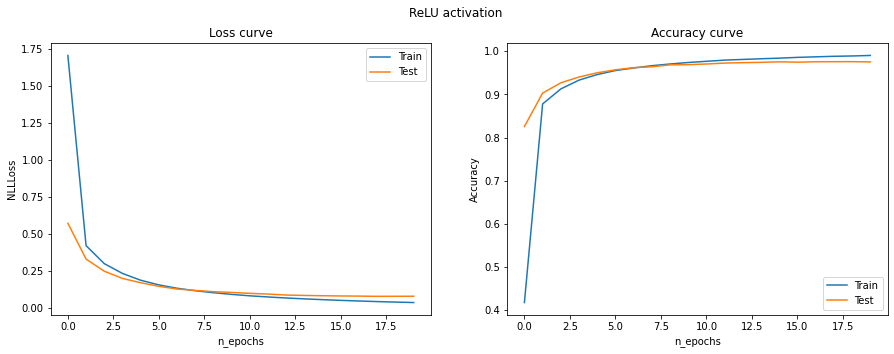

In [55]:
print(f"Train Loss: {round(train_loss_values[-1], 4)}    Train accuracy: {round(train_accuracy_values[-1], 4)}")
print(f"Test Loss: {round(test_loss_values[-1], 4)}   Test accuracy: {round(test_accuracy_values[-1], 4)}")

learning_curves(train_loss_values, test_loss_values, train_accuracy_values, test_accuracy_values, 
                title="ReLU activation")

Обучаем сеть с активацией ELU

In [56]:
nn = NeuralNetwork(modules=[
        Linear(784, 100),
        ELU(),
        Linear(100, 100),
        ELU(),
        Linear(100, 10),
    ])

train_loss_values, test_loss_values, train_accuracy_values, test_accuracy_values = train_nn(
    nn=nn, train=train_loader, test=test_loader)

Train Loss: 0.0477    Train accuracy: 0.9863
Test Loss: 0.0823   Test accuracy: 0.9749


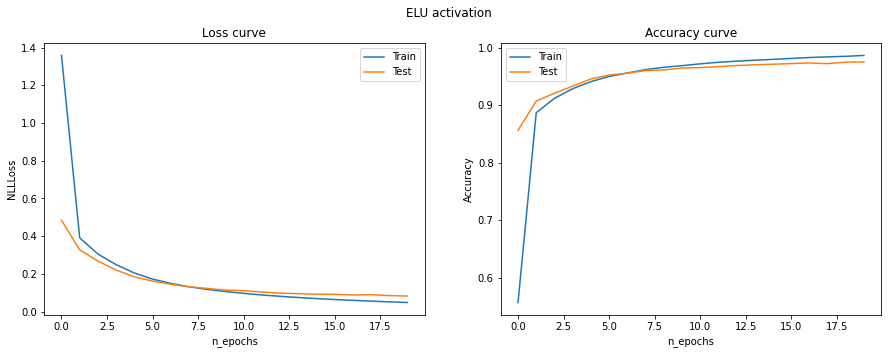

In [57]:
print(f"Train Loss: {round(train_loss_values[-1], 4)}    Train accuracy: {round(train_accuracy_values[-1], 4)}")
print(f"Test Loss: {round(test_loss_values[-1], 4)}   Test accuracy: {round(test_accuracy_values[-1], 4)}")

learning_curves(train_loss_values, test_loss_values, train_accuracy_values, test_accuracy_values, 
                title="ELU activation")

### Часть 3: Анализ ошибок
На каких объектах сеть ошибается больше всего?

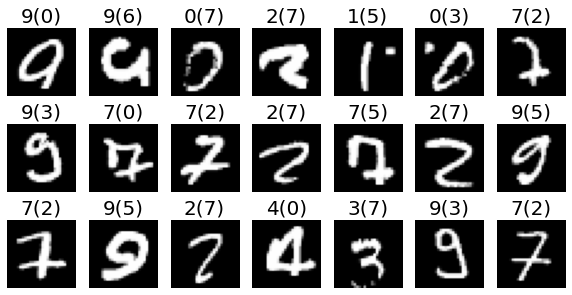

In [58]:
learning_rate = 1e-2
n_epochs = 20
loss = NLLLoss()
nn = NeuralNetwork(modules=[
    Linear(784, 100),
    Sigmoid(),
    Linear(100, 100),
    Sigmoid(),
    Linear(100, 10),
])

for epoch in range(n_epochs):
    for X, y in train_loader:
        predict = nn.forward(X.numpy().reshape(X.shape[0], X.shape[-1] * X.shape[-2]))
        loss.forward(predict, y.numpy())
        nn.backward(loss.backward())
        nn.step(learning_rate)
        
wrong_X = []
correct_y = []
predicted_y = []
logits = []

for X, y in test_loader:
    X = X.view(X.shape[0], -1).numpy()
    y = y.numpy()
    
    prediction = nn.forward(X)
    prediction = np.exp(prediction)
    prediction /= prediction.sum(1, keepdims=True)
    for i, _ in enumerate(prediction):
        if np.argmax(prediction[i]) != y[i]:
            wrong_X.append(X[i])
            correct_y.append(y[i])
            predicted_y.append(np.argmax(prediction[i]))
            logits.append(prediction[i][y[i]])

wrong_X = np.row_stack(wrong_X)
correct_y = np.row_stack(correct_y)[:, 0]
predicted_y = np.row_stack(predicted_y)[:, 0]
logits = np.row_stack(logits)[:, 0]

plt.figure(figsize=(10, 5))
order = np.argsort(logits)

for i in range(21):
    plt.subplot(3, 7, i + 1)
    plt.imshow(wrong_X[order[i]].reshape(28, 28), cmap=plt.cm.Greys_r)
    plt.title('{}({})'.format(correct_y[order[i]], predicted_y[order[i]]), fontsize=20)
    plt.axis('off')

### HW1 (1 балл): Реализовать Tanh

In [59]:
class Tanh:
    def __init__(self):
        pass

    def forward(self, X):
        self.X = X
        return np.tanh(X)
    
    def backward(self, dLdy):
        self.dydX = 4 * np.exp(2 * self.X) / ((np.exp(2 * self.X) + 1) ** 2)
        return dLdy * self.dydX

    def step(self, learning_rate):
        pass

Реализовали, обучим с ним сеть.

In [60]:
nn = NeuralNetwork(modules=[
        Linear(784, 100),
        Tanh(),
        Linear(100, 100),
        Tanh(),
        Linear(100, 10),
    ])

train_loss_values, test_loss_values, train_accuracy_values, test_accuracy_values = train_nn(
    nn=nn, train=train_loader, test=test_loader)

Train Loss: 0.0304    Train accuracy: 0.9935
Test Loss: 0.0796   Test accuracy: 0.9759


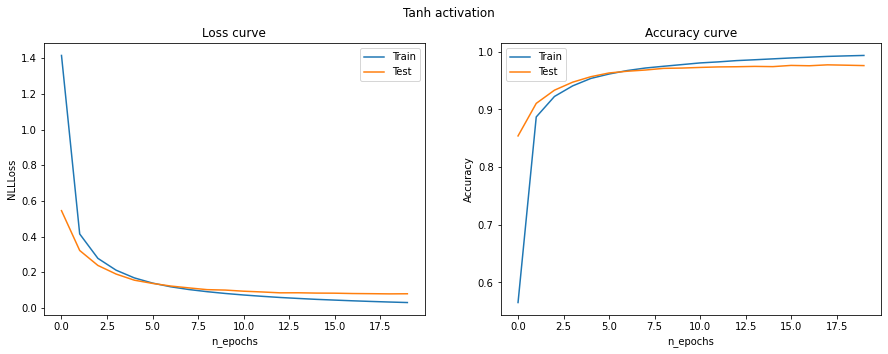

In [61]:
print(f"Train Loss: {round(train_loss_values[-1], 4)}    Train accuracy: {round(train_accuracy_values[-1], 4)}")
print(f"Test Loss: {round(test_loss_values[-1], 4)}   Test accuracy: {round(test_accuracy_values[-1], 4)}")

learning_curves(train_loss_values, test_loss_values, train_accuracy_values, test_accuracy_values, 
                title="Tanh activation")

### Часть 4: Аугментация (HW, 2 балла)
* Небольшие вращения (-15, 15)
* Случайные сдвиги
* Шум

Какой прирост дают эти аугментации вместе и по отдельности

In [64]:
class NormalNoise():
    def __init__(self, mean=0, std=1):
        self.mean = mean
        self.std = std

    def __call__(self, tensor):
        result = tensor + torch.randn(tensor.size()) * self.std + self.mean
        return result

Посмотрим, что аугментация делает с исходными картинками.

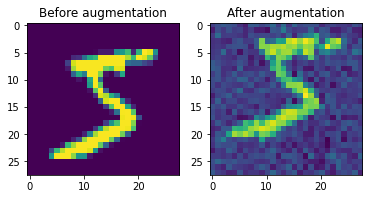

In [140]:
transform = transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                    ])

train_dataset = MNIST('.', train=True, download=False, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=False)

for X, y in train_loader:
    break
    
plt.subplot(1, 2, 1)
plt.title("Before augmentation")
plt.imshow(X[0].reshape(28, 28))


transform_train_aug = transforms.Compose([
                       transforms.RandomAffine(degrees=15, translate=(0.1, 0.1)),
                       transforms.ToTensor(),
                       NormalNoise(std=0.1),
                       transforms.Normalize((0.1307,), (0.3081,))
                    ])

train_dataset_aug = MNIST('.', train=True, download=False, transform=transform_train_aug)
train_loader_aug = DataLoader(train_dataset_aug, batch_size=32, shuffle=False)

for X, y in train_loader_aug:
    break

plt.subplot(1, 2, 2)
plt.title("After augmentation")
plt.imshow(X[0].reshape(28, 28));

Попробуем применить все аугментации вместе и обучить сеть с сигмоидой. Обычно аугментация датасета подразумевает, что его размер увеличивается. `torchvision.transforms` делает аугментации "на лету", показывая сети несколько новые данные каждую эпоху, поэтому следует увеличить количество эпох. Используем следующую логику: каждая новая аугментация не удваивает число объектов в датасете, а применяется только к исходным объектам, таким образом, для 3 аугментаций (сдвиг, вращение и шум) нужно увеличить количество эпох в 4 раза.

In [141]:
train_loader_aug = DataLoader(train_dataset_aug, batch_size=32, shuffle=True)

nn = NeuralNetwork(modules=[
        Linear(784, 100),
        Sigmoid(),
        Linear(100, 100),
        Sigmoid(),
        Linear(100, 10),
    ])

train_loss_values, test_loss_values, train_accuracy_values, test_accuracy_values = train_nn(
    nn=nn, train=train_loader_aug, test=test_loader, n_epochs=80)

Train Loss: 0.2009    Train accuracy: 0.939
Test Loss: 0.1003   Test accuracy: 0.9696


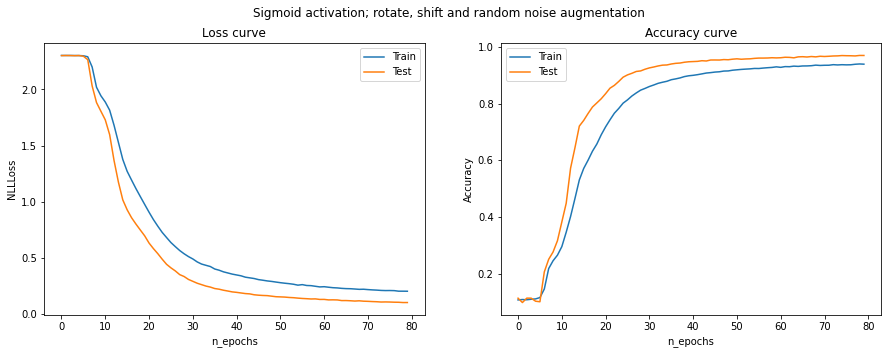

In [142]:
print(f"Train Loss: {round(train_loss_values[-1], 4)}    Train accuracy: {round(train_accuracy_values[-1], 4)}")
print(f"Test Loss: {round(test_loss_values[-1], 4)}   Test accuracy: {round(test_accuracy_values[-1], 4)}")

learning_curves(train_loss_values, test_loss_values, train_accuracy_values, test_accuracy_values, 
                title="Sigmoid activation; rotate, shift and random noise augmentation")

Качество классификации возрасло, и на тесте оно лучше, чем на трейне. Посмотрим, что дают отдельные аугментации. Здесь мы увеличим количество эпох в 2 раза.

Начнем с рандомных сдвигов.

Train Loss: 0.2705    Train accuracy: 0.9252
Test Loss: 0.1857   Test accuracy: 0.9522


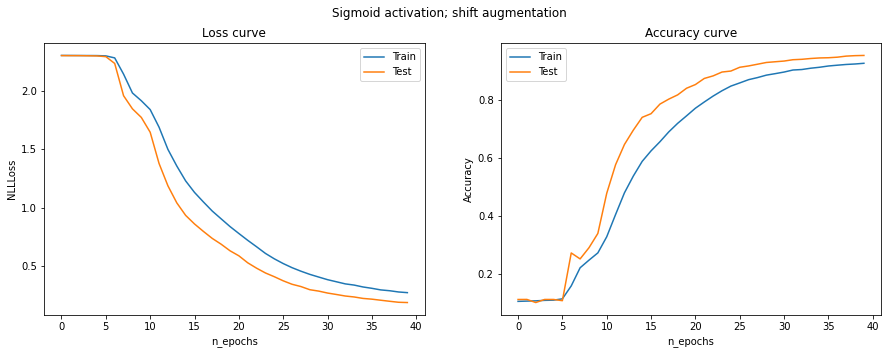

In [143]:
transform_train_aug = transforms.Compose([
                       transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)),
                       transforms.ToTensor(),
#                        NormalNoise(std=0.25),
                       transforms.Normalize((0.1307,), (0.3081,))
                    ])

train_dataset_aug = MNIST('.', train=True, download=False, transform=transform_train_aug)
train_loader_aug = DataLoader(train_dataset_aug, batch_size=32, shuffle=True)

nn = NeuralNetwork(modules=[
        Linear(784, 100),
        Sigmoid(),
        Linear(100, 100),
        Sigmoid(),
        Linear(100, 10),
    ])

train_loss_values, test_loss_values, train_accuracy_values, test_accuracy_values = train_nn(
    nn=nn, train=train_loader_aug, test=test_loader, n_epochs=40)

print(f"Train Loss: {round(train_loss_values[-1], 4)}    Train accuracy: {round(train_accuracy_values[-1], 4)}")
print(f"Test Loss: {round(test_loss_values[-1], 4)}   Test accuracy: {round(test_accuracy_values[-1], 4)}")

learning_curves(train_loss_values, test_loss_values, train_accuracy_values, test_accuracy_values, 
                title="Sigmoid activation; shift augmentation")

Посмотрим на вращения.

0it [00:00, ?it/s]

9920512it [00:02, 3649095.80it/s]                             


Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw
Using downloaded and verified file: ./MNIST/raw/train-labels-idx1-ubyte.gz
Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw
Using downloaded and verified file: ./MNIST/raw/t10k-images-idx3-ubyte.gz
Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw
Using downloaded and verified file: ./MNIST/raw/t10k-labels-idx1-ubyte.gz
Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw
Processing...
Done!
Train Loss: 0.1633    Train accuracy: 0.9537
Test Loss: 0.1392   Test accuracy: 0.961


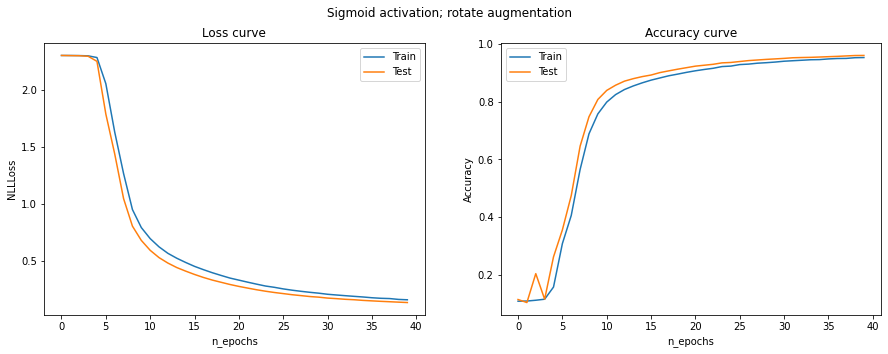

In [145]:
transform_train_aug = transforms.Compose([
                       transforms.RandomAffine(degrees=15),
                       transforms.ToTensor(),
#                        NormalNoise(std=0.25),
                       transforms.Normalize((0.1307,), (0.3081,))
                    ])

train_dataset_aug = MNIST('.', train=True, download=True, transform=transform_train_aug)
train_loader_aug = DataLoader(train_dataset_aug, batch_size=32, shuffle=True)

nn = NeuralNetwork(modules=[
        Linear(784, 100),
        Sigmoid(),
        Linear(100, 100),
        Sigmoid(),
        Linear(100, 10),
    ])

train_loss_values, test_loss_values, train_accuracy_values, test_accuracy_values = train_nn(
    nn=nn, train=train_loader_aug, test=test_loader, n_epochs=40)

print(f"Train Loss: {round(train_loss_values[-1], 4)}    Train accuracy: {round(train_accuracy_values[-1], 4)}")
print(f"Test Loss: {round(test_loss_values[-1], 4)}   Test accuracy: {round(test_accuracy_values[-1], 4)}")

learning_curves(train_loss_values, test_loss_values, train_accuracy_values, test_accuracy_values, 
                title="Sigmoid activation; rotate augmentation")

А теперь случайный шум.

Train Loss: 0.1417    Train accuracy: 0.9617
Test Loss: 0.1476   Test accuracy: 0.9596


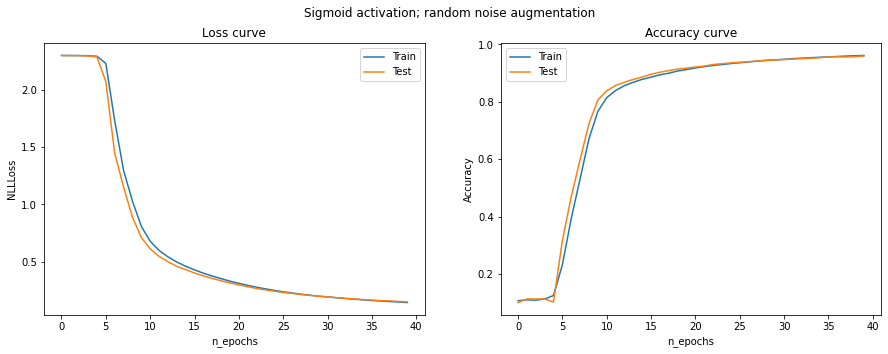

In [146]:
transform_train_aug = transforms.Compose([
#                        transforms.RandomAffine(degrees=15),
                       transforms.ToTensor(),
                       NormalNoise(std=0.1),
                       transforms.Normalize((0.1307,), (0.3081,))
                    ])

train_dataset_aug = MNIST('.', train=True, download=False, transform=transform_train_aug)
train_loader_aug = DataLoader(train_dataset_aug, batch_size=32, shuffle=True)

nn = NeuralNetwork(modules=[
        Linear(784, 100),
        Sigmoid(),
        Linear(100, 100),
        Sigmoid(),
        Linear(100, 10),
    ])

train_loss_values, test_loss_values, train_accuracy_values, test_accuracy_values = train_nn(
    nn=nn, train=train_loader_aug, test=test_loader, n_epochs=40)

print(f"Train Loss: {round(train_loss_values[-1], 4)}    Train accuracy: {round(train_accuracy_values[-1], 4)}")
print(f"Test Loss: {round(test_loss_values[-1], 4)}   Test accuracy: {round(test_accuracy_values[-1], 4)}")

learning_curves(train_loss_values, test_loss_values, train_accuracy_values, test_accuracy_values, 
                title="Sigmoid activation; random noise augmentation")

Обучите нейронную сеть с другими нелинейностями: ReLU и ELU. Сравните скорости сходимости и качество классификации с различными функциями активации.

Лучше всего себя показала комбинация трех аугментаций. Используем ее с другими функциями активации.

In [153]:
transform_train_aug = transforms.Compose([
                       transforms.RandomAffine(degrees=15, translate=(0.1, 0.1)),
                       transforms.ToTensor(),
                       NormalNoise(std=0.1),
                       transforms.Normalize((0.1307,), (0.3081,))
                    ])

train_dataset_aug = MNIST('.', train=True, download=True, transform=transform_train_aug)
train_loader_aug = DataLoader(train_dataset_aug, batch_size=32, shuffle=True)

nn = NeuralNetwork(modules=[
        Linear(784, 100),
        ReLU(),
        Linear(100, 100),
        ReLU(),
        Linear(100, 10),
    ])

train_loss_values, test_loss_values, train_accuracy_values, test_accuracy_values = train_nn(
    nn=nn, train=train_loader_aug, test=test_loader, n_epochs=80)

Train Loss: 0.0872    Train accuracy: 0.9725
Test Loss: 0.0391   Test accuracy: 0.9864


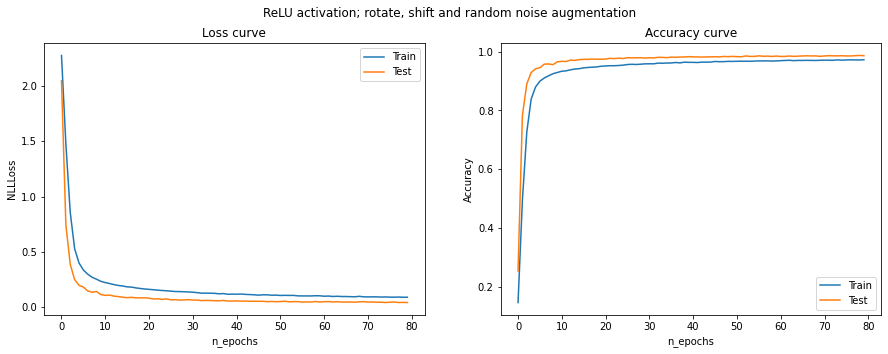

In [154]:
print(f"Train Loss: {round(train_loss_values[-1], 4)}    Train accuracy: {round(train_accuracy_values[-1], 4)}")
print(f"Test Loss: {round(test_loss_values[-1], 4)}   Test accuracy: {round(test_accuracy_values[-1], 4)}")

learning_curves(train_loss_values, test_loss_values, train_accuracy_values, test_accuracy_values, 
                title="ReLU activation; rotate, shift and random noise augmentation")

In [155]:
transform_train_aug = transforms.Compose([
                       transforms.RandomAffine(degrees=15, translate=(0.1, 0.1)),
                       transforms.ToTensor(),
                       NormalNoise(std=0.1),
                       transforms.Normalize((0.1307,), (0.3081,))
                    ])

train_dataset_aug = MNIST('.', train=True, download=False, transform=transform_train)
train_loader_aug = DataLoader(train_dataset_aug, batch_size=32, shuffle=True)

nn = NeuralNetwork(modules=[
        Linear(784, 100),
        ELU(),
        Linear(100, 100),
        ELU(),
        Linear(100, 10),
    ])

train_loss_values, test_loss_values, train_accuracy_values, test_accuracy_values = train_nn(
    nn=nn, train=train_loader_aug, test=test_loader, n_epochs=80)

Train Loss: 0.1167    Train accuracy: 0.9627
Test Loss: 0.0424   Test accuracy: 0.9858


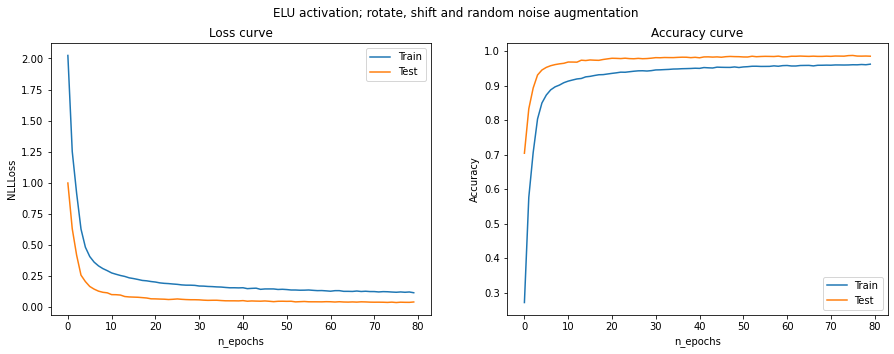

In [156]:
print(f"Train Loss: {round(train_loss_values[-1], 4)}    Train accuracy: {round(train_accuracy_values[-1], 4)}")
print(f"Test Loss: {round(test_loss_values[-1], 4)}   Test accuracy: {round(test_accuracy_values[-1], 4)}")

learning_curves(train_loss_values, test_loss_values, train_accuracy_values, test_accuracy_values, 
                title="ELU activation; rotate, shift and random noise augmentation")

### Часть 5: Выводы
Опишите полученные результаты: как влияют выбор нелинейности и предобработка данных на скорость сходимости и итоговое качество?

В случае сигмоиды наблюдается медленная сходимость и точность на уровне 0.9225.

Использование ReLU и ELU в качестве функций активации повышает качество до 0.975. Также с ними модель сходится значительно быстрее. Использование Tanh привело к повышению качества классификации до 0.9759 и такой же быстрой сходимости. Однако также наблюдалось некоторое переобучение: в случае ReLU, ELU и Tanh точность на обучающей выборке (в среднем 0.99) была больше, чем на тестовой.

Применения аугментаций с увеличением количества эпох позволило избежать переобучения и повысить точность.

Сводная таблица качетсва классификации и условий обучения модели: ~~без прямых ссылок, так как для каждой модели переобъявлял переменные :(~~

| Функция активации | Аугментации | Train accuracy | Test accuracy |
| --- | --- | --- | --- |
| Sigmoid | - | 0.9226 | 0.9225 |
| ReLU | - | 0.9903 | 0.9753 |
| ELU | - | 0.9863 | 0.9749 |
| Tanh | - | 0.9935 | 0.9759 |
| Sigmoid | shift, rot, noise | 0.939 | 0.9696 |
| Sigmoid | shift | 0.9252 | 0.9522 |
| Sigmoid | rot | 0.9537 | 0.961 |
| Sigmoid | noise | 0.9617 | 0.9596 |
| ReLU | shift, rot, noise | 0.9725 |  0.9864 |
| ELU | shift, rot, noise | 0.9627 | 0.9858 |